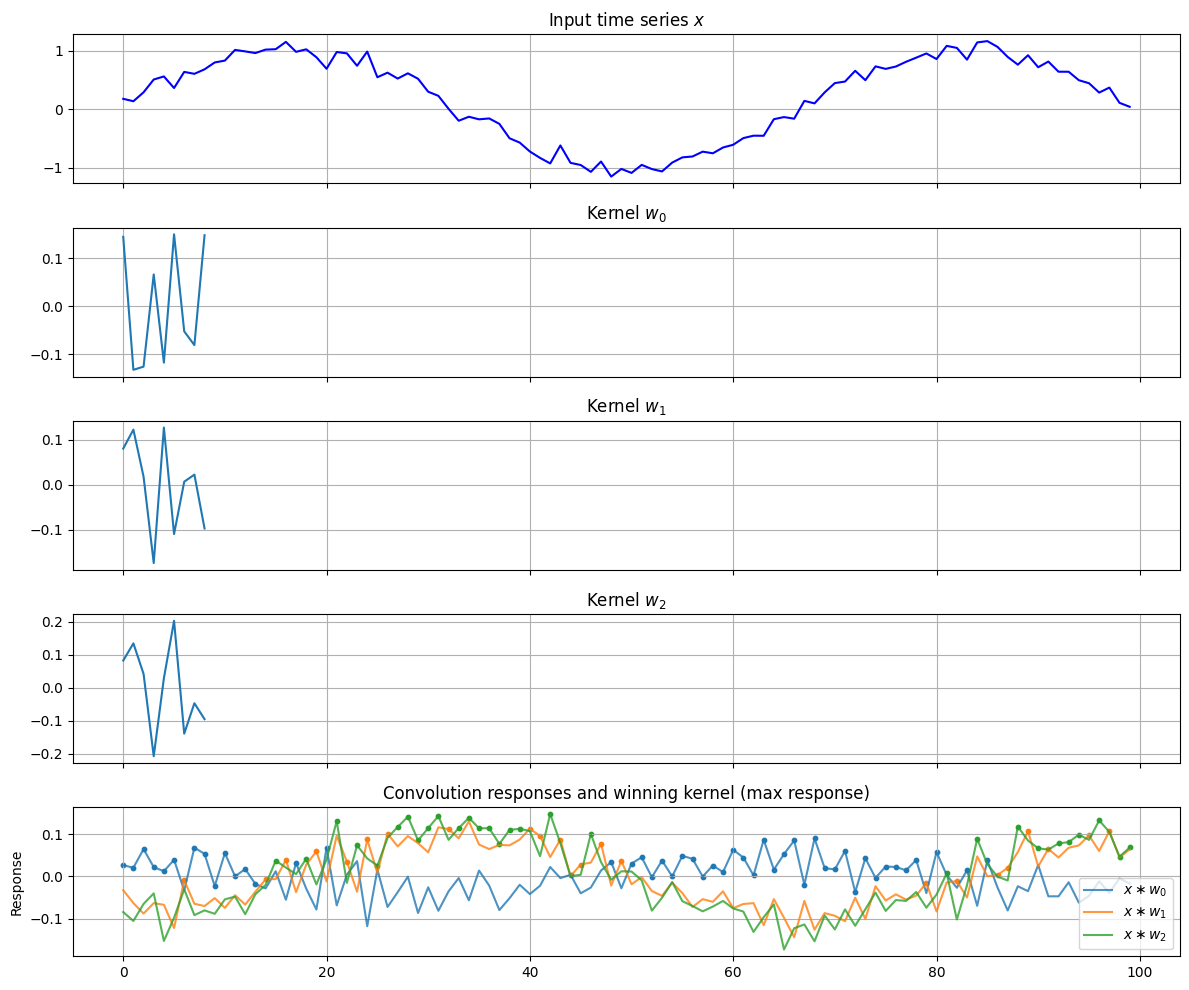

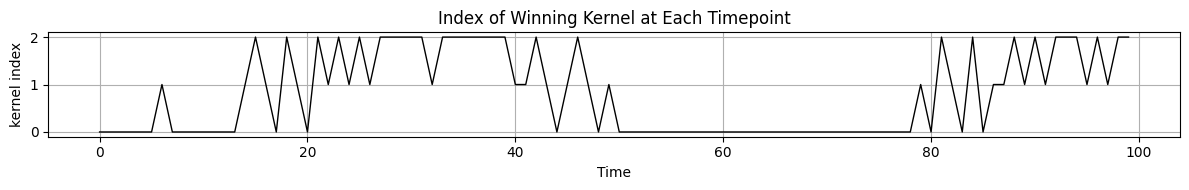

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 1. Define input time series x
np.random.seed(0)
x = np.sin(np.linspace(0, 3 * np.pi, 100)) + 0.1 * np.random.randn(100)

# 2. Define a group of 3 random kernels w_i (length 9)
kernel_size = 9
num_kernels = 3
kernels = [np.random.randn(kernel_size) for _ in range(num_kernels)]

# Normalize kernels (as Hydra does)
kernels = [(k - np.mean(k)) / np.sum(np.abs(k)) for k in kernels]

# 3. Perform convolution with padding to preserve length
responses = np.array([
    np.convolve(x, k[::-1], mode='same')  # reverse kernel for dot product form
    for k in kernels
])

# 4. Find the kernel with the maximum response at each timepoint
winning_kernels = np.argmax(responses, axis=0)

# 5. Plot
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

# Plot input time series
axs[0].plot(x, color='blue')
axs[0].set_title("Input time series $x$")
axs[0].grid(True)

# Plot each kernel
for i, k in enumerate(kernels):
    axs[1 + i].plot(k, label=f'Kernel $w_{i}$')
    axs[1 + i].set_title(f'Kernel $w_{i}$')
    axs[1 + i].grid(True)

# # Plot responses and highlight winners
# axs[4].set_title("Winning kernel at each timepoint")
# for i in range(num_kernels):
#     mask = (winning_kernels == i)
#     axs[4].scatter(np.where(mask), responses[i, mask], label=f'$w_{i}$', s=10)

# axs[4].legend()
# axs[4].grid(True)

# 5. Plot smoothed response curves and winning regions
axs[4].set_title("Convolution responses and winning kernel (max response)")
colors = ['C0', 'C1', 'C2']  # consistent kernel colors

# Plot each response curve
for i in range(num_kernels):
    axs[4].plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i], alpha=0.8)

# Optionally: highlight regions where each kernel wins
for i in range(num_kernels):
    mask = (winning_kernels == i)
    axs[4].scatter(np.where(mask), responses[i, mask], color=colors[i], s=10)

axs[4].set_ylabel("Response")
axs[4].legend()
axs[4].grid(True)


plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 2))
ax2.plot(winning_kernels, color="black", lw=1)
ax2.set_title("Index of Winning Kernel at Each Timepoint")
ax2.set_yticks(range(num_kernels))
ax2.set_ylabel("kernel index")
ax2.set_xlabel("Time")
ax2.grid(True)
plt.tight_layout()
plt.show()



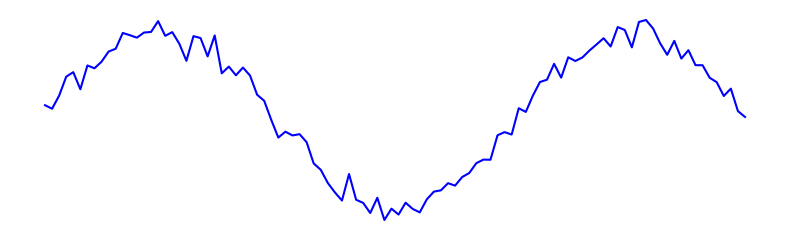

In [2]:
plt.figure(figsize=(8, 2.5))
plt.plot(x, color='blue')
# plt.title("Input Time Series $x$")
# plt.xlabel("Time")
# plt.ylabel("Value")
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()


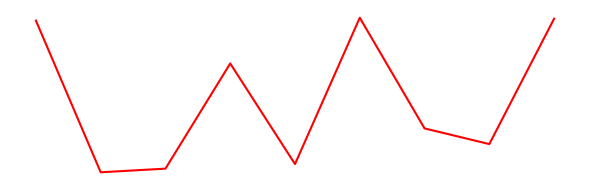

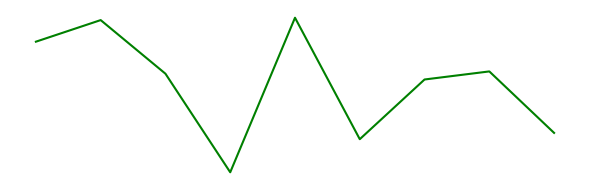

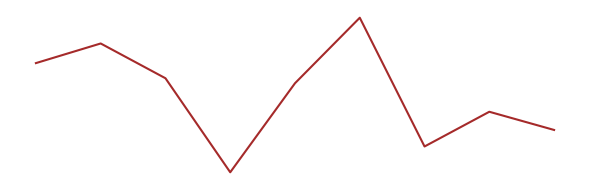

In [3]:
# for i, k in enumerate(kernels):
#     plt.figure(figsize=(6, 2))
#     plt.plot(k, label=f'Kernel $w_{i}$')
#     plt.title(f'Kernel $w_{i}$')
#     plt.xlabel("Time (within kernel)")
#     plt.ylabel("Value")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

colors = ['red', 'green', 'brown']

for i, (k, color) in enumerate(zip(kernels, colors)):
    plt.figure(figsize=(6, 2))
    plt.plot(k, label=f'Kernel $w_{{{i}}}$', color=color)
    # plt.title(f'Kernel $w_{{{i}}}$')
    # plt.xlabel("Time (within kernel)")
    # plt.ylabel("Value")
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


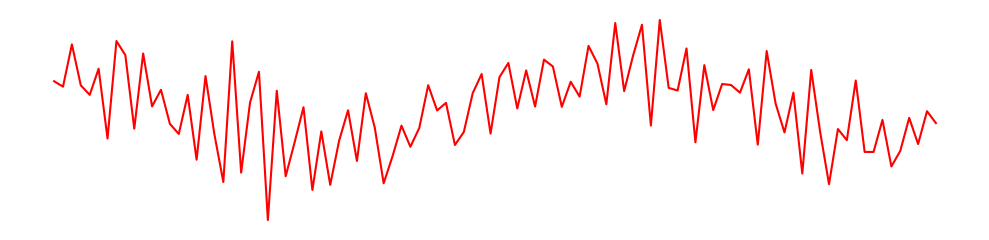

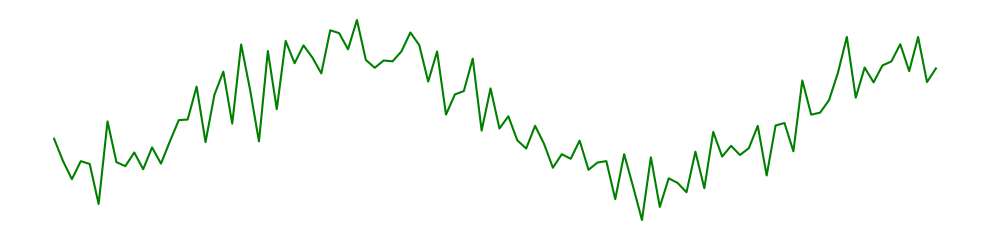

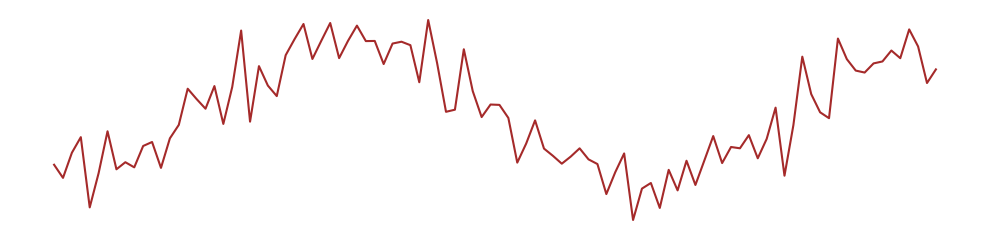

In [4]:
for i in range(len(kernels)):
    plt.figure(figsize=(10, 2.5))
    # plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=f"C{i}")
    plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i])
    # plt.title(f"Convolution Response: $x \\ast w_{i}$")
    # plt.xlabel("Time")
    # plt.ylabel("Response")
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


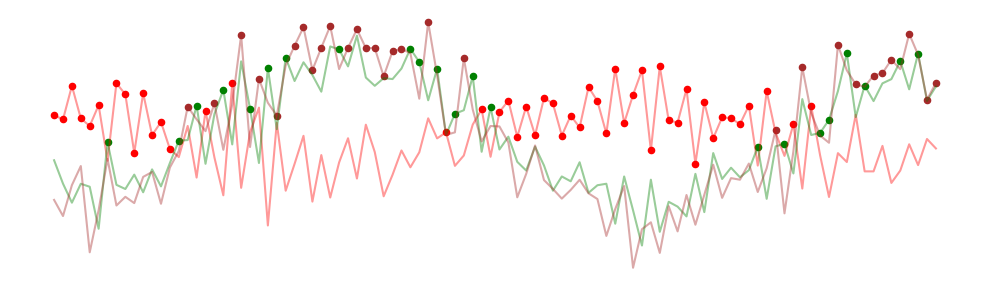

In [5]:
plt.figure(figsize=(10, 3))
# colors = ['C0', 'C1', 'C2']

for i in range(len(kernels)):
    # plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i], alpha=0.8)
    plt.plot(responses[i], label=f"$x \\ast w_{i}$", color=colors[i], alpha=0.4)

# Highlight winning points
for i in range(len(kernels)):
    mask = (winning_kernels == i)
    plt.scatter(np.where(mask), responses[i, mask], s=20, color=colors[i])

# plt.title("Responses and Winning Kernel at Each Timepoint")
# plt.xlabel("Time")
# plt.ylabel("Response")
# plt.legend()
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()

# I want to mark the wining subsquencewith bold instead of circle point


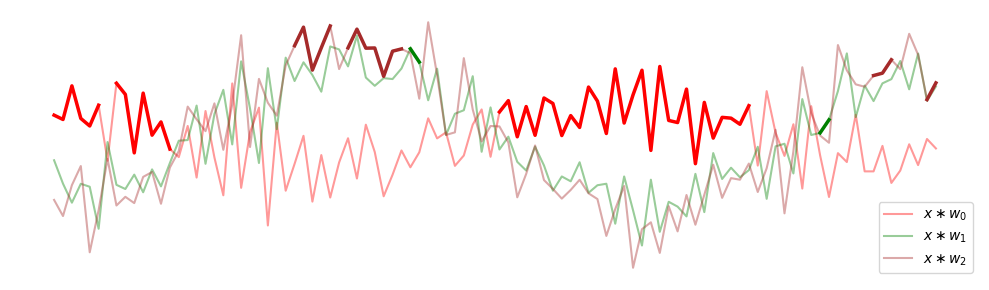

In [6]:
import matplotlib.pyplot as plt

# Define colors
colors = ['red', 'green', 'brown']
line_alpha = 0.4      # base transparency for full curves
bold_line_width = 2.5 # thickness of bold segments

plt.figure(figsize=(10, 3))

# 1. Plot all response curves (faded)
for i in range(len(kernels)):
    plt.plot(responses[i], label=f"$x \\ast w_{{{i}}}$", color=colors[i], alpha=line_alpha)

# 2. Overlay bold winning subsequences
for i in range(len(kernels)):
    mask = (winning_kernels == i)
    # Break mask into continuous segments
    idx = np.where(mask)[0]
    if len(idx) == 0:
        continue
    # Split into contiguous blocks
    splits = np.split(idx, np.where(np.diff(idx) > 1)[0] + 1)
    for seg in splits:
        plt.plot(seg, responses[i][seg], color=colors[i], linewidth=bold_line_width)

# 3. Optional: remove axes and legend
plt.legend()
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()


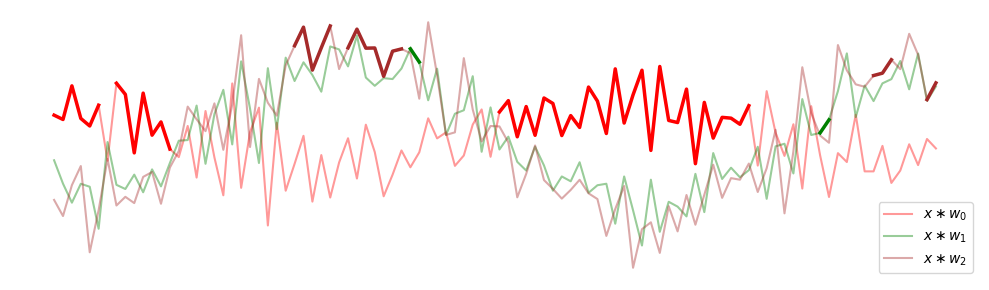

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example: colors = ['red', 'green', 'brown']
colors = ['red', 'green', 'brown']
line_alpha = 0.4
bold_line_width = 2.5

plt.figure(figsize=(10, 3))

# 1. Plot full response curves (faded)
for i in range(len(kernels)):
    plt.plot(responses[i], label=f"$x \\ast w_{{{i}}}$", color=colors[i], alpha=line_alpha)

# 2. Overlay bold lines for winning subsequences
for i in range(len(kernels)):
    mask = (winning_kernels == i)
    indices = np.where(mask)[0]
    
    if len(indices) == 0:
        continue

    # Split indices into contiguous segments
    splits = np.split(indices, np.where(np.diff(indices) != 1)[0] + 1)

    for seg in splits:
        if len(seg) > 1:  # At least 2 points to draw a line
            y_segment = responses[i][seg]
            plt.plot(seg, y_segment, color=colors[i], linewidth=bold_line_width)

# 3. Make it pretty
plt.legend()
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.show()


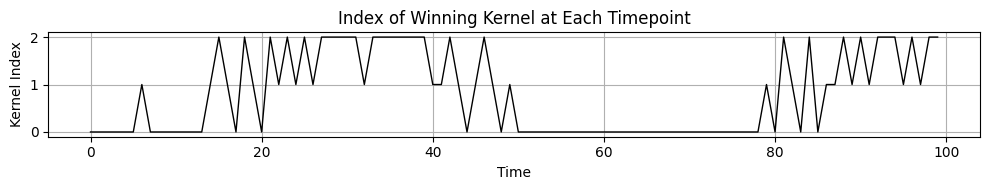

In [9]:
plt.figure(figsize=(10, 2))
plt.plot(winning_kernels, color='black', lw=1)
plt.title("Index of Winning Kernel at Each Timepoint")
plt.xlabel("Time")
plt.ylabel("Kernel Index")
plt.yticks(range(len(kernels)))
plt.grid(True)
plt.tight_layout()
plt.show()

# For this part, I want to represent it in a list of numbers.


In [16]:
# Convert to plain Python list (optional)
winning_kernel_list = (winning_kernels + 1).tolist() # Plus one so the first kernel starts at 1

# Print as a space-separated string
print("Winning kernel indices per timepoint:")
print(' '.join(map(str, winning_kernel_list)))


Winning kernel indices per timepoint:
1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 3 2 1 3 2 1 3 2 3 2 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 3 2 1 2 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 2 1 3 1 2 2 3 2 3 2 3 3 3 2 3 2 3 3


In [ ]:
# winning_kernels is a 1D array where each value is the index of the winning kernel at that timepoint
num_kernels = len(kernels)

# Count how many times each kernel wins
winning_counts = np.bincount(winning_kernels, minlength=num_kernels)

# Print results
for i, count in enumerate(winning_counts):
    print(f"Kernel w_{i} wins at {count} timepoints")


Kernel w_0 wins at 49 timepoints
Kernel w_1 wins at 22 timepoints
Kernel w_2 wins at 29 timepoints
